In [52]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os


In [63]:
data_path=os.path.abspath(
    os.path.join(
    os.path.pardir,
    'ml-latest-small',
    'ratings.csv',
    ))

#rating=pd.read_csv(data_path)
#OR
rating=pd.read_csv("../ml-latest-small/ratings.csv",sep=",")
#OR
#rating=pd.read_csv("C:/Users/35841/ml__class_programming/ml-latest-small/ratings.csv",sep=",")
rating.head(5)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
os.getcwd()


'C:\\Users\\35841\\ml__class_programming\\Optimizations'

In [4]:
print(rating.shape)
print(rating.describe())
## As can be seen from the table, there are 610 different people
print(rating.userId.value_counts().shape)
print(rating.movieId.value_counts().shape)
## There are 9724 unique movies

(100836, 4)
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09
(610,)
(9724,)


In [5]:
movie_title=pd.read_csv("C:/Users/35841/ml__class_programming/ml-latest-small/movies.csv",sep=",")
print(movie_title.shape)
print(movie_title.head())
## It seems 9742-9724=18 movies are not rated and don't have any information about user and ratings
## We will also try to figure out what happened with those entries
A=rating.movieId.unique()
print(len(A))
B=movie_title.movieId.unique()
print(len(B))
unused=np.setdiff1d(B,A)
print(unused)


(9742, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
9724
9742
[ 1076  2939  3338  3456  4194  5721  6668  6849  7020  7792  8765 25855
 26085 30892 32160 32371 34482 85565]


In [6]:
movie_title.title[movie_title.movieId[unused]]
#It seems there are few NaN values.Also there are few movies with no user ratings and inputs

movieId
1396.0                                   Smoke Signals (1998)
3942.0                                 Time After Time (1979)
4521.0                Once Upon a Time in the Midlands (2002)
4714.0                                         Revenge (1990)
6051.0      Match Factory Girl, The (Tulitikkutehtaan tytt...
27865.0                                                   NaN
57504.0                                                   NaN
61818.0                                                   NaN
68480.0                                                   NaN
91978.0                                                   NaN
128620.0                                                  NaN
NaN                                                       NaN
NaN                                                       NaN
NaN                                                       NaN
NaN                                                       NaN
NaN                                                       NaN


In [7]:
df=pd.merge(rating,movie_title,on="movieId")
df.head(5)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:

print(df.shape)
print(df.describe())
## As can be seen from the table, there are 610 different people
print(df.userId.value_counts().shape)
print(df.movieId.value_counts().shape)
## There are 9724 unique movies

(100836, 6)
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09
(610,)
(9724,)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [10]:
movie_rating=pd.DataFrame(df.groupby('title')['rating'].mean())
movie_rating.head(5)

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [11]:
movie_rating['people_count']=df.groupby('title')['rating'].count()
movie_rating.head(10)

,rating,people_count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


100836


(array([  96.,    0.,    7.,    5.,    0.,  150.,    5.,    4.,   16.,
          10.,    3.,  215.,   28.,   35.,   28.,   30.,  447.,   32.,
          75.,  110.,  122.,   58.,  540.,   98.,  143.,  283.,  164.,
         971.,  180.,  242.,  351.,  316.,  232., 1061.,  248.,  288.,
         413.,  308., 1150.,  115.,  166.,  167.,   65.,   22.,  378.,
           7.,    7.,   29.,    3.,  296.]),
 array([0.5 , 0.59, 0.68, 0.77, 0.86, 0.95, 1.04, 1.13, 1.22, 1.31, 1.4 ,
        1.49, 1.58, 1.67, 1.76, 1.85, 1.94, 2.03, 2.12, 2.21, 2.3 , 2.39,
        2.48, 2.57, 2.66, 2.75, 2.84, 2.93, 3.02, 3.11, 3.2 , 3.29, 3.38,
        3.47, 3.56, 3.65, 3.74, 3.83, 3.92, 4.01, 4.1 , 4.19, 4.28, 4.37,
        4.46, 4.55, 4.64, 4.73, 4.82, 4.91, 5.  ]),
 <a list of 50 Patch objects>)

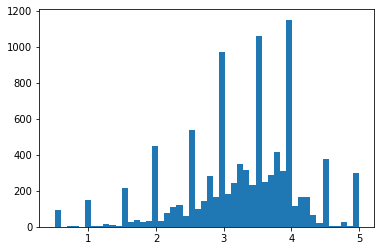

In [13]:
##There are 100836 users who rated the movies
print(movie_rating.people_count.sum())
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(movie_rating['rating'],bins=50)

In [47]:
movie_rating[movie_rating['rating']==5].head()
#print(movie_rating.shape)
#print(movie_rating[movie_rating['rating']==5].count())
#movie_rating['rating'].value_counts()

,rating,people_count
title,,
'Salem's Lot (2004),5.0,1
12 Angry Men (1997),5.0,1
12 Chairs (1976),5.0,1
20 Million Miles to Earth (1957),5.0,1
61* (2001),5.0,1


(array([6.068e+03, 9.800e+02, 5.500e+02, 4.710e+02, 2.310e+02, 1.840e+02,
        1.400e+02, 1.620e+02, 7.200e+01, 8.300e+01, 9.000e+01, 7.200e+01,
        6.700e+01, 5.800e+01, 5.400e+01, 3.400e+01, 3.000e+01, 4.500e+01,
        2.600e+01, 2.300e+01, 2.000e+01, 1.900e+01, 1.700e+01, 1.300e+01,
        1.300e+01, 1.500e+01, 1.100e+01, 1.500e+01, 1.000e+01, 8.000e+00,
        1.100e+01, 9.000e+00, 1.200e+01, 7.000e+00, 4.000e+00, 5.000e+00,
        8.000e+00, 5.000e+00, 3.000e+00, 8.000e+00, 5.000e+00, 2.000e+00,
        7.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

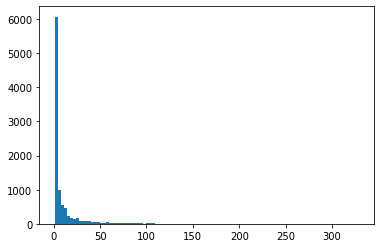

In [15]:
plt.hist(movie_rating['people_count'],bins=100)

In [16]:
movie_rating['people_count'].max()

329

In [17]:
movie_rating['people_count'].mean()

10.375141475460438

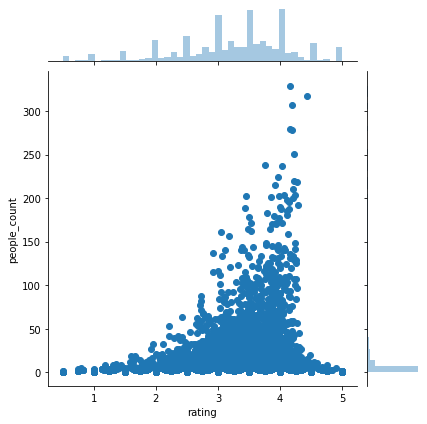

In [18]:
import seaborn as sns
sns.jointplot(x='rating', y='people_count', data=movie_rating)

In [19]:
movie_matrix=pd.pivot_table(df,values='rating',index='userId',columns='title')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(movie_matrix.shape)
type(movie_matrix)

(610, 9719)


pandas.core.frame.DataFrame

In [23]:
movie_rating.sort_values('people_count', ascending=False).head(10)

,rating,people_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [48]:
##let's assume that a person has watched Terminator 2: Judgment Day (1991) and Matrix, The (1999)
terminator_rating=movie_matrix['Terminator 2: Judgment Day (1991)']
print(terminator_rating.shape)
terminator_rating.head()

(610,)


userId
1    NaN
2    NaN
3    NaN
4    NaN
5    3.0
Name: Terminator 2: Judgment Day (1991), dtype: float64

In [25]:
jurrasic_rating=movie_matrix['Jurassic Park (1993)']
jurrasic_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Jurassic Park (1993), dtype: float64

In [26]:
similar_to_terminator=movie_matrix.corrwith(terminator_rating)
similar_to_terminator.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                        -0.050602
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.411008
*batteries not included (1987)             0.566379
dtype: float64

In [27]:
similar_to_jurrasic=movie_matrix.corrwith(jurrasic_rating)
similar_to_jurrasic.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.104077
'night Mother (1986)                            NaN
(500) Days of Summer (2009)               -0.125237
*batteries not included (1987)             0.290929
dtype: float64

In [35]:
corr_terminator=pd.DataFrame(similar_to_terminator,columns=['correlation'])
corr_terminator.dropna(inplace=True)
corr_terminator[corr_terminator.correlation==1].head(5)
corr_terminator.shape


(4833, 1)

In [33]:
corr_jurrasic=pd.DataFrame(similar_to_jurrasic,columns=['correlation'])
corr_jurrasic.dropna(inplace=True)
corr_jurrasic[corr_jurrasic.correlation==1].head(5)

,correlation
title,
"10th Kingdom, The (2000)",1.0
1941 (1979),1.0
3 Ninjas Kick Back (1994),1.0
8 ½ Women (a.k.a. 8 1/2 Women) (a.k.a. Eight and a Half Women) (1999),1.0
After the Thin Man (1936),1.0


In [37]:
corr_terminator=corr_terminator.join(movie_rating['people_count'])
corr_jurrasic=corr_jurrasic.join(movie_rating['people_count'])
corr_terminator.head()

,correlation,people_count
title,,
"'burbs, The (1989)",-0.050602,17
(500) Days of Summer (2009),0.411008,42
*batteries not included (1987),0.566379,7
...And Justice for All (1979),-0.327327,3
10 Cent Pistol (2015),-1.000000,2


In [44]:
corr_terminator[(corr_terminator['people_count'] > 10) & (corr_terminator['correlation']>0.9)]

,correlation,people_count
title,,
Date Night (2010),1.000000,11
Hanna (2011),0.908105,11
Horrible Bosses 2 (2014),0.965581,11
Hostel (2005),0.902096,11
Jack Reacher (2012),0.934199,12
"Killer, The (Die xue shuang xiong) (1989)",0.917495,11
Lake Placid (1999),0.908786,12
"Parent Trap, The (1961)",0.954348,12
Strange Brew (1983),0.950907,11


In [46]:
corr_jurrasic[(corr_jurrasic['people_count'] > 10) & (corr_jurrasic['correlation']>0.9)]

,correlation,people_count
title,,
John Carter (2012),0.934009,11
Jurassic Park (1993),1.000000,238
Oliver & Company (1988),0.922263,11
Rise of the Planet of the Apes (2011),0.920379,27
Shall We Dance? (Shall We Dansu?) (1996),0.944610,13


In [51]:
52/(np.sqrt(54)*np.sqrt(52))

0.9813067629253164